In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [9]:
# Preprocess iris data (take only two classes)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
trainset = df.iloc[:100, [0,2]].values
target = df.iloc[:100,4].values
target = np.where(target == 'Iris-setosa', -1, 1)

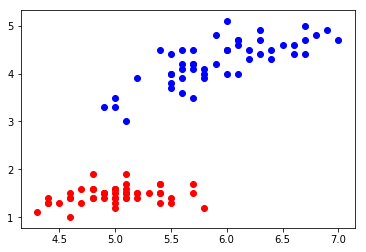

In [10]:
# Plot iris data
plt.scatter(trainset[:50, 0], trainset[:50, 1], color='red')
plt.scatter(trainset[50:, 0], trainset[50:, 1], color='blue')
plt.show()

In [11]:
# Standardize data
trainset_std = np.copy(trainset)
trainset_std[:, 0] = (trainset[:, 0] - np.mean(trainset[:, 0])) / np.std(trainset[:, 0])
trainset_std[:, 1] = (trainset[:, 1] - np.mean(trainset[:, 1])) / np.std(trainset[:, 1])

X_train, X_test, y_train, y_test = train_test_split(trainset_std, target, test_size=0.3)

In [15]:
logreg = LogisticRegression(n_iters=5, learning_rate=0.01).fit(X_train, y_train)

[-0.48956507  0.14504896 -0.45273733 -0.27550867  0.1440618  -0.36560373
 -0.50797895 -0.09235709 -0.4711512  -0.05158073  0.25454504 -0.20185317
 -1.12812772 -0.09136994  0.05297959  0.39988172  0.87370666 -0.25215903
 -0.01475298 -0.40243147 -0.38006899 -0.69014337 -0.50797895 -0.16107682
 -0.78221274 -0.05158073 -0.59906116 -0.32976313 -0.71250586  0.30879951
 -0.83548005  0.69154223 -0.90913554  0.07632923 -0.41689673 -0.65627709
 -0.08840848  0.72738283 -0.40243147 -0.38006899 -0.2705729   0.49096394
 -0.21927989  0.27690753  0.3446401  -0.69014337 -0.50797895 -0.92754942
 -0.2705729   0.83786607 -0.05750365 -0.08840848 -0.22026705 -0.38006899
 -0.60399692 -0.34718985 -0.36165512 -0.43432345 -0.72697112 -0.59906116
 -1.00021776 -0.22026705 -0.78122559 -0.4711512   1.1111127  -0.72697112
 -0.39848286  0.96478887 -1.18238218 -0.90913554]
[ 1.80790234  0.0406372   2.03511074 -0.84923579 -0.53370403 -0.26857436
  1.69429814 -0.28753499  1.92150654  2.23703831  0.14792119 -0.39481898
 

In [14]:
print(accuracy_score(y_test, logreg.predict(X_test)))

0.0
